In [ ]:
                                        # Subway Data Analysis

## Introduction

The NYC public transportantion system - Metro Transit Authority - provides data for download via csv files. Part of the information available are data from the subway turnstiles, containing weekly logs for cumulative entries and exits by turnstile and by subway station during a provided timeframe.


For this project, we will only use the information available at: http://web.mta.info/developers/turnstile.html.




# About this project

For this project, you will apply the knowledge acquired in the first month of this course. We will practice basic data acquisition and data cleaning tasks to find out fundamental stuff about the data using what we learned in the Statistics course. 

The goal of this project is to explore the relationship between data from the NYC Subway turnstiles and the city weather. For this, besides data from the subway, we will also need data from the weather in NYC. 

Here are the main points that will be considered in this work:

- Gathering data from the Internet
- Using Statistics for Data Analysis
- Data handling and simple graphics creation with `Pandas`

*How to find help*: We suggest that you try the following channels, in the following order:

| Type of Question\Channels    	| Google 	| Forum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Pandas and Python Programming 	| 1      	| 2     	| 3     	|       	|
| Projects Requiriments         	|        	| 1     	| 2     	| 3     	|
| Projects Specific Parts       	|        	| 1     	| 2     	| 3     	|

Here is the address for each of these channels:

- Forum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [Big Data Foundations](https://goo.gl/4K7LWK)
- Email: india@udacity.com

**The student is expected to submit this report including:**

- All TODO's completed, as they are crucial for the code to run accordingly
- The ipynb file, exported as html

To submit this project, go to the [classroom](https://coco.udacity.com/nanodegrees/nd100-inbig/locale/en-us/versions/1.0.0/parts/469348/modules/469702/lessons/469703/project), and submit your zipped `.ipynb` and html.

# Reminders

Before we start, there are a few things you must have in mind while using iPython notebooks:

- Remember you can see, in the left side of a code cell, when was the last time it ran, if there is a number inside the keys.
- When starting a new session in the notebook, please make sure to run all cells up to the point where you last left it. Even if the output can still be viewed from the moment you ran your cells in the previews session, the kernel starts in a new state, so you will need to reload all data, etc. in a new session.
- The previous point is useful to have in mind if your answers do not match what is expected from the quizzes in the classroom. Try reloading the data and running all processing steps, one by one, to make sure you're working with the same variables and data from each step of the quizz.

Note-: Before Starting this project please go through all the instructions stated in README.md file.

## Session 1 - Data Gathering

### *Exercise 1.1*

Let's do it!! Now it's your turn to gather data. Please write bellow a Python code to access the link http://web.mta.info/developers/turnstile.html and download all files from June 2017. The file must be named turnstile_100617.txt, where 10/06/17 is the file's date.

Please see below a few commands that might help you:

Use the **urllib** library to open and redeem a webpage. Use the command below, where **url** is the webpage path to the following file:

```python
u = urllib.urlopen(url)
html = u.read()
```

Use the **BeautifulSoup** library to search for the link to the file you want to donwload in the page. Use the command below to create your *soup* object and search for all 'a' tags in the document:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

A tip to only download the files from June is to check data in the name of the file. For instance, to donwload the 17/06/2017 file, please see if the link ends with *"turnstile_170610.txt"*. If you forget to do this, you will download all files from that page. In order to do this, you can use the following command:

```python
if '1706' in link.get('href'):
```

Our final tip is to use the command bellow to download the txt file:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Please remember - you first have to load all packages and functions that will be used in your analysys.

In [1]:
# All the necessary modules needed are imported over here
import urllib
import urllib.request
from bs4 import BeautifulSoup

#your code here
url =  'http://web.mta.info/developers/turnstile.html' #This is the url from where file is downloaded
u = urllib.request.urlopen(url)
html = u.read()

soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
for x in links:
    reference=x.get('href') #It is used to fetch the href part of the <a> tag.
    if reference is not None and '1706' in reference:
        filename = "turnstile_" + reference[-6:-4] + reference[-8:-6] + reference[-10:-8]+".txt" #It is used to slice the string from the end and changed the file format from yyyy/mm/dd to dd/mm/yyyy. The End is indexed -1 and the result produced at the end is a file named turnstile_030617.txt to turnstile_240617.txt   
        url_fetch = 'http://web.mta.info/developers/'+ reference #The necessary file is downloaded from this url.
        urllib.request.urlretrieve(url_fetch,filename)


### *Exercise 1.2*

Write down a function that takes the list of all names of the files you downloaded in Exercise 1.1 and compile them into one single file. There must be only one header line in the output file. 

For example, if file_1 has:
line 1...
line 2...

and the other file, file_2, has:
line 3...
line 4...
line 5...

We must combine file_1 and file_2 into one master file, as follows:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
line 1...
line 2...
line 3...
line 4...
line 5...


In [3]:
#This is list of the important files needed and all of these files must be present in one folder.
filenames = {"turnstile_030617.txt","turnstile_100617.txt","turnstile_170617.txt","turnstile_240617.txt"}
def create_master_turnstile_file(filenames, output_file):
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in sorted(filenames):#Now this is used to display the files in the sorted order that is(The content of the file1 is displayed first, then second and at the last third file. )
            with open(filename,'r') as current_file: #used to open the current file from the list of files.
                next(current_file) #It is used to skip the header part of the current file.
                master_file.write(current_file.read()) #This is used to read the whole current file's characters as a string and write it to the main master file.
    return None

create_master_turnstile_file(filenames,'Output_File.txt') #This is the name of the resultant file which contains the comipiled data of all the files stated above.


### *Exercise 1.3*

For this exercise, you will write a function that reads the master_file created in the previous exercise and load it into a Pandas Dataframe. This function can be filtered, so that the Dataframe only has lines where column "DESCn" has the value "Regular".

For example, if the Pandas Dataframe looks like this:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

The Dataframe must look like the following, after filtering only the lines where column DESCn has the value REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [4]:
#This is an important module which is used to read the data from the file.
import pandas as ps

Input_File=open("Output_File.txt",'r')#This is output file which we created in the earlier exercise 1.3 and is used as an input file over here.

def filter_by_regular(filename):#This is the defined function.
    
    turnstile_data = ps.read_csv("Output_File.txt")#Using the module pandas we are reading the data of the file 'Output_File.txt' over here.
    turnstile_data = turnstile_data.loc[turnstile_data['DESCn']=='REGULAR']#turnstile_data.loc is used to directly access the locations as per the requirement. For example in this case it will select the rows having 'REGULAR' as value of 'DESCn' column.
    return turnstile_data

df=filter_by_regular(Input_File)
df.to_csv("Output_File.txt",index=None)#This is already existing output file in the folder and is updated to produce the desired results. 


In [ ]:
Exercise 1.4
The NYC Subway data has cumulative entry and exit data in each line. Let's assume you have a Dataframe called df, which contains only lines for one particular turnstile (unique SCP, C/A, and UNIT). The following function must change these cumulative entries for counting all entries since the last reading (entries from the last line of the Dataframe).

More specifically, there are two things you should do:

1 - Create a new column, called ENTRIESn_hourly 2 - Insert in this column the difference between ENTRIESn in the current and the previous column. If the line has any NAN, fill it out/replace by 1.

Tip: The funtions shift() and fillna() in Pandas might be usefull for this exercise.

Below you will find and example of how your Dataframe should look by the end of this exercise:

    C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243


In [5]:
#This module is to used to read the data from the file.
import pandas as ps

input_frame = ps.read_csv("Output_File.txt")#This is our file created in ealier exercise 1.3 through which we read our data.

def get_hourly_entries(data_file):
    data_file['ENTRIESn_hourly']=data_file['ENTRIESn']-data_file['ENTRIESn'].shift(1)#This is used to create a new column 'ENTRIESn_hourly' which is assigned the difference of the values of i and i-1 row of the "ENTRIESn" column. data_file.shift(x) is used to shift by x units. 
    data_file.fillna(value=1,inplace=True)#fills NAN value with x
    data_file.ENTRIESn_hourly = data_file.ENTRIESn_hourly.astype(int) #This is used to convert the datatype of the 'ENTRIESn_hourly' column from float to int.
    
    return data_file

output_frame = get_hourly_entries(input_frame)
output_frame.to_csv("Output_File.txt",index=None)#This is our output file containing the deired results which will be used in the next exercise and without wirting index=None an extra column will added displaying the index values. 

### *Exercise 1.5*

Do the same thing you did in the previous exercise, but taking into account the exits, column EXITSn.
For this, you need to create a column called EXITSn_hourly and insert the difference between the column EXITSn in the current line vs he previous line. If there is any NaN, fill it out/replace by 0.



In [6]:
#This module is used to read the data from the input file.
import pandas as ps

input_frame = ps.read_csv("Output_File.txt")#This is our file created in ealier exercise 1.4 through which we read our data.

def get_hourly_exits(data_file):
    data_file['EXITSn_hourly']=data_file['EXITSn']-data_file['EXITSn'].shift(1)#This is used to create a new column 'ENTRIESn_hourly' which is assigned the difference of the values of i and i-1 row of the "ENTRIESn" column. data_file.shift(x) is used to shift by x units.
    data_file.fillna(value=0,inplace=True)#fills NAN value with x
    data_file.EXITSn_hourly = data_file.EXITSn_hourly.astype(int) #This is used to convert the datatype of the 'ENTRIESn_hourly' column from float to int.
    return data_file

output_frame = get_hourly_exits(input_frame)
output_frame.to_csv("Output_File.txt",index=None)#This is our output file containing the deired results which will be used in the next exercise and without wirting index=None an extra column will added displaying the index values.

### *Exercise 1.6*

Given an entry variable that represents time, in the format:
     "00:00:00" (hour: minutes: seconds)
    
Write a function to extract the hour part from the time in the entry variable
And return it as an integer. For example:
         
         1) if hour is 00, your code must return 0
         2) if hour is 01, your code must return 1
         3) if hour is 21, your code must return 21
        
Please return te hour as an integer.


In [7]:
#This module is used to read the data from the input file.
import pandas as ps

input_frame = ps.read_csv("Output_File.txt")#This is our file created in ealier exercise 1.5 through which we read our data.

def time_to_hour(time):
    hour = time.TIMEn.str.slice(-8,-6).astype(int)#It is used to extracts the hour part from the TIMEn and converts it to integer.
    return hour

output_frame = time_to_hour(input_frame)
output_frame.to_csv('Output_File.txt',index=None)#This is our output file containing the deired results which will be used in the next exercise and without wirting index=None an extra column will added displaying the index values.

## Exercise 2 - Data Analysis

### *Exercise 2.1*

To understand the relationship between the Subway activity and the weather, please complete the data from the file already downloaded with the weather data.
We provided you with the file containing NYC weather data and made it available with the Support Material. You can access it through the link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now that we have our data in a csv file, write Python code that reads this file and saves it into a Pandas Dataframe. 

Tip: 

Use the command below to read the file:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [2]:
#This module is used to read the data from the input file.
import pandas as pd

filename = "turnstile_data_master_with_weather.csv" #This is the file present in a single folder from which is used to read the data
data_file=pd.read_csv(filename,sep=",")

### *Exercise 2.2*

Now, create a function that calculates the number of rainy days. For this, return the count of the number of days where the column *"rain"* is equal to 1.

Tip: You might think that interpreting numbers as integers or floats might not
     work at first. To handle this issue, it might be useful to convert
     these numbers into integers. You can do this by writting cast (column as integer).
     So, for example, if we want to launch the column maxtempi as an integer, we have to
     write something like cast (maxtempi as integer) = 76, instead of just
     where maxtempi = 76.

In [8]:
#This module is used to read the data from the input file.
import pandas as pd 

filename = "turnstile_data_master_with_weather.csv" 
data_file = pd.read_csv(filename)#This is used to read the data frame from the given file

def num_rainy_days(data_file):
    
    count = data_file['rain'].astype(int).sum()#astype(int) is used to convert the values of column to int datatype and sum is used to calculate the number of rainy days.
    return count #this is used to return the resultant value of the function

print(num_rainy_days(data_file))#This is used to print the value returned the function above.


44104


### *Exercise 2.3*

Calculate if the day was cloudy or not (0 or 1) and the maximum temperature for fog (i.e. the maximum temperature 
     for cloudy days).

In [9]:
#Module used to read the data from the file.
import pandas as pd

filename = "turnstile_data_master_with_weather.csv" #This is the file from which we read the data frame.
data_file=pd.read_csv(filename)

def max_temp_aggregate_by_fog(data_file):
    
    #your code here 
    data_file = data_file.loc[data_file["fog"]==1]#this is used to filter the data of the file and returns the rows containing value of FOG=1.
    max_temp = data_file['maxtempi'].max()#It is used to give the maximum value of the tempi column among the filtered rows.
    return max_temp#This is used to return the maximum temperature.

print(max_temp_aggregate_by_fog(data_file))#This is used to print the maximum temperature in the foggy days.

81.0


### *Exercise 2.4

Now, calculate the mean for 'meantempi' for the days that are Saturdays or Sundays (weekend):

In [8]:
#Module used to read the data from the file.
import pandas as pd

filename = "turnstile_data_master_with_weather.csv" #This file is used to interpret our results.

data_file=pd.read_csv(filename)

def avg_weekend_temperature(filename):
    filename['DATEn']=pd.to_datetime(filename.DATEn)#Convert the datatype of the column from object to datetime
    day=(filename.DATEn.dt.weekday).astype(int)#retrieves the day[0-6] from the given DATE where is 0 is for Monday and 6 is for sunday. while 
    filename = filename.loc[(day==5) | (day==6)]#It is used to filter the data of the file and gives the rows with day=5(saturday)and day=6(sunday)
    mean_temperature_weekends = filename["meantempi"].mean()#It is used to take out the mean of the column 'meantempi' of the filtered data.
    return mean_temperature_weekends

print(avg_weekend_temperature(data_file))#It is used to print the value returned by the function above.

65.10066685403307


### *Exercise 2.5

Calculate the mean of the minimum temperature 'mintempi' for the days when the minimum temperature was greater that 55 degrees:

In [7]:
#This module is used to read the file.
import pandas as pd

filename="turnstile_data_master_with_weather.csv"#Using the pandas module we are able to read this file
data_file=pd.read_csv(filename)

def avg_min_temperature(filename):

    filename =filename.loc[filename['mintempi']>55]#This is used to fetch those rows which have value of'mintempi'>55
    avg_min_temperature_rainy = filename['mintempi'].mean()#Used to calculate the mean of the filtered data.   
    return avg_min_temperature_rainy

print(avg_min_temperature(data_file))#This is used to print the value returned by the function above. 

63.2699012987013


### *Exercise 2.6

Before you make any analysis, it might be useful to look at the data we want to analyse. More specifically, we will evaluate the entries by hour in our data from the NYC Subway to determine the data distribution. This data is stored in the column ['ENTRIESn_hourly'].
    
Draw two histogramns in the same axis, to show the entries when it's raining vs when it's not. 
Below, you will find an example of how to draw histogramns with Pandas and Matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

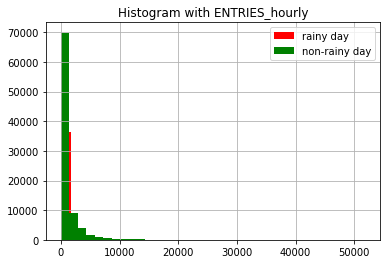

In [23]:
#These are the necessary modules needed
import numpy as np
import pandas
import matplotlib.pyplot as plt

filename="turnstile_data_master_with_weather.csv"#This file is read using the pandas module
data_file=pd.read_csv(filename)

def entries_histogram(turnstile_weather):
    
    plt.figure()
    plt.title("Histogram with ENTRIES_hourly")#This is used to display the title of our plotted histogram
    turnstile_weather.loc[turnstile_weather['rain']==1]['ENTRIESn_hourly'].hist(histtype='bar',bins=30,color='red',rwidth= 2.5,label='rainy day')#This code is used to display the histogram with hourly entries when it is raining
    turnstile_weather.loc[turnstile_weather['rain']==0]['ENTRIESn_hourly'].hist(histtype='bar',bins=30,color='green',rwidth=2.5,label='non-rainy day')#This code is used to display the histogram with hourly entries when it is not raining
    plt.legend()#This helps us to use legends in our histogram to make it more informative.
    return plt

entries_histogram(data_file).show()#This is used to call the above function which is used to plot a histogram with hourly entries for rainy and non rainy day. 

### *Exercise 2.7

The data you just plotted is in what kind of distribution? Is there a difference in distribution between rainy and non-rainy days?

** Answer **: The data plotted or shown in the above histogram is in the skewed distribution form.It is more of an Asymmetrical dataset and is a Right skewed distribution. Yes, we can see a difference in the distribution between the rainy and the non-rainy days as the hourly entries on rainy day is less than that of non-rainy day.   

### *Exercise 2.8

Build a function that returns:

1. The mean of entries when it's raining
2. The mean of entries when it's not raining




In [28]:
#These are necessary modules needed
import numpy as np

import pandas as pd

filename="turnstile_data_master_with_weather.csv" #We read this file using the pandas module. 
data_file=pd.read_csv(filename)

def means(turnstile_weather):
    
    p=" " #Just took it as an empty string.
    ### YOUR CODE HERE ###
    rainy_day=turnstile_weather.loc[turnstile_weather['rain']==1]#This is used to filter the data and gives the data only of rainy days
    non_rainy_day=turnstile_weather.loc[turnstile_weather['rain']==0]#This is used to filter the data and gives that of non-rainy day
    with_rain_mean = rainy_day['ENTRIESn_hourly'].mean()#This is used to take out the mean of the rainy day datasets.
    without_rain_mean = non_rainy_day['ENTRIESn_hourly'].mean()#This is used to take out the mean of the non-rainy day datasets.
    
    return with_rain_mean, without_rain_mean, p # leave this line for the grader

print(means(data_file))#This is used to call the above function and print the values retuened by the function.

(1105.4463767458733, 1090.278780151855, ' ')


Answer to the following questions according to your functions' exits:

1. What is the mean of entries when it's raining?
2. What is the mean of entries when it's not raining?


** Answer **: Mean of the entries when it is raining: 1105.4463767458733, 
              Mean of the entries when it is not raining: 1090.278780151855

## Exercise 3 - Map Reduce

### *Exercise 3.1*

The entry for this exercise is the same file from the previous session (Exercise 2). You can download the file from this link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now, we will create a mapper. For each entry line, the mapper exit must PRINT (not return) UNIT as a key, and the number of ENTRIESn_hourly as the value. Separate the key and the value with a tab. For example: 'R002 \ t105105.0'

Export your mapper into a file named mapper_result.txt and send it with your submission. The code for exporting your mapper is already written in the code bellow.




In [8]:
#This is the necessary module needed for this exercise.
import sys

sys.stdin = open('turnstile_data_master_with_weather.csv')#Using the module are able to read the given file.
sys.stdout = open('mapper_result.txt', 'w')#Using the module we are able to able to create the file named 'mapper_result.txt' which contains the results.

def mapper():
    sys.stdin.readline() #This is used to read the first line of the file and skip it inorder to prevent undsired results.
    for line in sys.stdin:
        data = line.strip().split(',')
        if len(data)==22: #This condition will work only when it finds a row with 22 columns and evrything else will be ignored.
            print("{0}\t{1}".format(data[1],data[6])) #In this data[1] is UNIT column and data[6] is the ENTRIESn_hourly column and will print them in 'mapper.txt' with '\t' in between.
                  
mapper() #This is used to call the function created above

### *Exercise 3.2*

Now, create the reducer. Given the mapper result from the previous exercise, the reducer must print (not return) one line per UNIT, with the total number of ENTRIESn_hourly during May (which is our data duration), separated by a tab. An example of exit line from the reducer may look like this: 'R001 \ t500625.0'

You can assume that the entry for the reducer is ordered in a way that all lines corresponding to a particular unit are grouped. However, the reducer exit will have repetition, as there are stores that appear in different files' locations.

Export your reducer into a file named reducer_result.txt and send it with your submission.

In [9]:
import sys

sys.stdin = open('mapper_result.txt','r')#This is used to read the file mapper.txt which is in one folder where this is as well.
sys.stdout = open('reducer_result.txt', 'w')#This is used to produce the results in a file named 'reducer_result.txt'

def reducer():
    
    sum = 0
    old_key = None
    for line in sys.stdin:
        # your code here
        mapped_data = line.strip().split('\t')
        if len(mapped_data)!= 2:#if result from mapper has two or more columns then skip it.
            continue
        new_key, val = mapped_data#else if the columns are equal to two then set UNITS=key and ENTRIESN_hourly as value.
        
        if old_key != new_key:#printing the UNIT and total ENTRIESN_hourly once as long as old_key!= new_Key and as it finds the new key we print result of the old_key.
            print(old_key, "\t", sum)
            old_key = new_key
            sum = 0 #Here we set the value of the variable sum = 0 for next UNIT that is when new key is found. 
        old_key = new_key 
        sum += float(val)#we will keep adding the sum to the previous sum as long as the old_key and new_key are same
        
    if old_key != None: #This is used to print the last UNIT.
        print(old_key,"\t",sum)
        
reducer() #This is used to call the function created above.
